# Data Preparation - Coaches

In [1]:
import pandas as pd
from data_prep_helpers import *
import matplotlib.pyplot as plt

df = pd.read_csv('../data/coaches.csv')
df.head()

,coachID,year,tmID,lgID,stint,won,lost,post_wins,post_losses
0,adamsmi01w,5,WAS,WNBA,0,17,17,1,2
1,adubari99w,1,NYL,WNBA,0,20,12,4,3
2,adubari99w,2,NYL,WNBA,0,21,11,3,3
3,adubari99w,3,NYL,WNBA,0,18,14,4,4
4,adubari99w,4,NYL,WNBA,0,16,18,0,0


## Data Cleaning

### Dealing with Missing Values / Features

<Axes: title={'center': 'Number of null values per column'}>

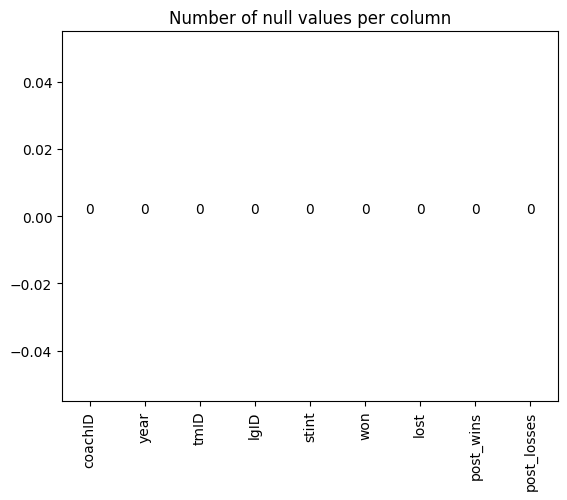

In [2]:
nulls_values_by_column(df)

### Dealing with Duplicate values / Redundant Data

<Axes: title={'center': 'Number of Unique Values Per Column'}>

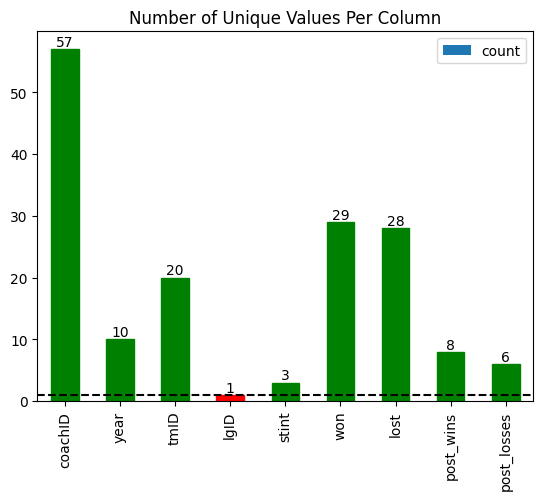

In [3]:
unique_values_by_column(df, 1)

In [4]:
num_columns = len(df.columns)
df = filter_column_uniques(df, 1)
print(f"Removed {num_columns - len(df.columns)} columns that had only one unique value")

Removed 1 columns that had only one unique value


In [5]:
num_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {num_rows - df.shape[0]} repeated rows")

Removed 0 repeated rows


### Outliers and Noise

In [6]:
#df1 = nulls_by_column(df)
#df1.plot(kind="bar", title="Bar Plot")

### Dealing with Inconsistent / Conflicting Data 